In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
type(X_train)

numpy.ndarray

In [5]:
len(X_test)

10000

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[59000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 100, 254, 158,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 182, 253, 150,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        123, 247, 253,  68,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

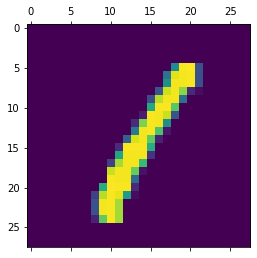

In [8]:
plt.matshow(X_train[3])

In [9]:
y_train[5]

2

In [10]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

**Scaling**

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
x_train_flattened = X_train.reshape(len(X_train),28*28) #Creating single dimentional array for each digit
x_test_flattened = X_test.reshape(len(X_test),28*28) #Creating single dimentional array for each digit

In [14]:
x_train_flattened.shape

(60000, 784)

In [15]:
x_train_flattened[1] #single dimensional array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Without Hidden layers**

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer = 'adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    
)
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 598us/step - loss: 0.4675 - accuracy: 0.87690s - loss: 0.5042 - accu
Epoch 2/5
1875/1875 [==============================] - 1s 612us/step - loss: 0.3031 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 1s 612us/step - loss: 0.2830 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 610us/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 598us/step - loss: 0.2665 - accuracy: 0.9255


In [17]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 510us/step - loss: 0.2675 - accuracy: 0.9264


[0.2675328850746155, 0.9264000058174133]

In [18]:
model.predict(x_test_flattened)


array([[2.91952789e-02, 2.41208738e-07, 5.52820861e-02, ...,
        9.99752522e-01, 8.50625336e-02, 7.22109318e-01],
       [4.87715602e-01, 4.23565507e-03, 9.99346733e-01, ...,
        1.00908713e-12, 2.55058885e-01, 4.71053774e-09],
       [4.95523214e-04, 9.92133975e-01, 6.33482337e-01, ...,
        1.44368887e-01, 4.08030689e-01, 4.59910631e-02],
       ...,
       [3.35896402e-06, 2.15690579e-06, 5.92201948e-04, ...,
        1.76616997e-01, 5.11118889e-01, 7.71784425e-01],
       [1.62363052e-04, 1.04978346e-04, 1.31249428e-04, ...,
        2.72317120e-05, 6.60319090e-01, 1.21298312e-04],
       [8.54796171e-03, 5.06590381e-10, 1.64773852e-01, ...,
        3.82472187e-08, 3.47077847e-04, 1.03181799e-06]], dtype=float32)

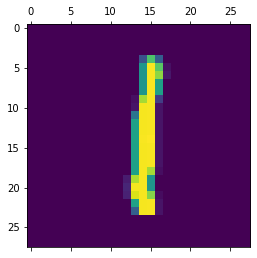

In [19]:
plt.matshow(X_test[889])

In [20]:
ypred = model.predict(x_test_flattened)
ypred[889]

array([3.69959052e-05, 9.99319911e-01, 2.35198379e-01, 6.77099705e-01,
       6.81129098e-03, 8.87164772e-02, 1.45286828e-01, 1.20625734e-01,
       6.37811601e-01, 2.38049895e-01], dtype=float32)

In [21]:
np.argmax(ypred[889]) #convert and print the integer value of index [889]

1

**Confusion Matrix - (y_test, ypred)**

In [22]:
ypred_label = [np.argmax(i) for i in ypred] #convert and print the integer values of ypred
ypred_label[:5]

[7, 2, 1, 0, 4]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=ypred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   8,    9,  913,   16,   10,    5,   13,   10,   44,    4],
       [   3,    0,   15,  924,    1,   21,    2,   10,   25,    9],
       [   1,    1,    2,    1,  920,    0,   12,    4,   10,   31],
       [  11,    2,    2,   30,   11,  772,   16,    6,   35,    7],
       [  10,    3,    4,    1,    7,   13,  915,    2,    3,    0],
       [   1,    5,   22,    7,   10,    0,    0,  945,    3,   35],
       [   7,    6,    5,   18,    9,   19,    9,   10,  882,    9],
       [  11,    6,    1,    9,   30,    7,    0,   15,    7,  923]])>

Text(0.5, 1.0, 'Confusion Matrix')

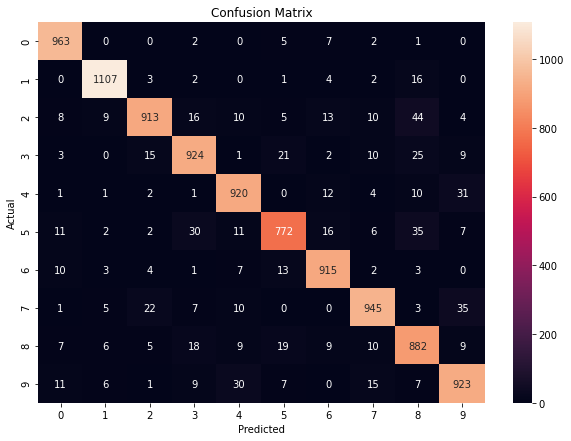

In [25]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

**With Hidden Layer**

In [26]:
model1 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model1.compile(
    optimizer = 'adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    
)
model1.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 796us/step - loss: 0.2763 - accuracy: 0.9206
Epoch 2/5
1875/1875 [==============================] - 1s 793us/step - loss: 0.1279 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 1s 796us/step - loss: 0.0886 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 1s 767us/step - loss: 0.0674 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 1s 780us/step - loss: 0.0525 - accuracy: 0.9837


In [27]:
model1.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 577us/step - loss: 0.0755 - accuracy: 0.9747


[0.07545410096645355, 0.9746999740600586]

In [38]:
ypred1 = model.predict(x_test_flattened)
ypred1

array([[2.91952789e-02, 2.41208738e-07, 5.52820861e-02, ...,
        9.99752522e-01, 8.50625336e-02, 7.22109318e-01],
       [4.87715602e-01, 4.23565507e-03, 9.99346733e-01, ...,
        1.00908713e-12, 2.55058885e-01, 4.71053774e-09],
       [4.95523214e-04, 9.92133975e-01, 6.33482337e-01, ...,
        1.44368887e-01, 4.08030689e-01, 4.59910631e-02],
       ...,
       [3.35896402e-06, 2.15690579e-06, 5.92201948e-04, ...,
        1.76616997e-01, 5.11118889e-01, 7.71784425e-01],
       [1.62363052e-04, 1.04978346e-04, 1.31249428e-04, ...,
        2.72317120e-05, 6.60319090e-01, 1.21298312e-04],
       [8.54796171e-03, 5.06590381e-10, 1.64773852e-01, ...,
        3.82472187e-08, 3.47077847e-04, 1.03181799e-06]], dtype=float32)

In [29]:
ypred_label1 = [np.argmax(i) for i in ypred1] #convert and print the integer values of ypred
ypred_label1[:5]

[7, 2, 1, 0, 4]

**Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

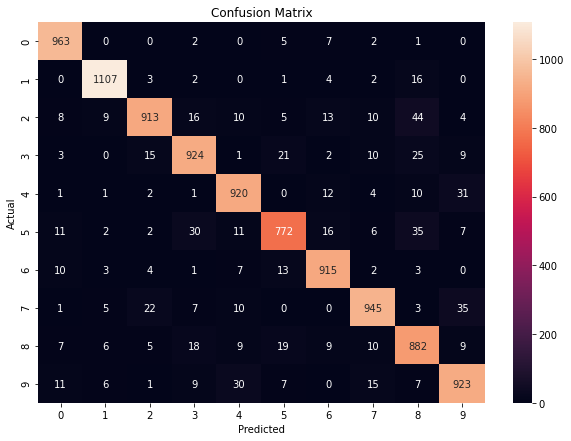

In [30]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=ypred_label1)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

**Flatten() function**

In [31]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model2.compile(
    optimizer = 'adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
    
)
model2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 779us/step - loss: 0.2745 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 1s 775us/step - loss: 0.1207 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.0851 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 1s 767us/step - loss: 0.0648 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 1s 771us/step - loss: 0.0504 - accuracy: 0.9845


In [32]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 587us/step - loss: 0.0891 - accuracy: 0.9722


[0.08914393931627274, 0.9721999764442444]

In [36]:
ypred2 = model2.predict(X_test)
ypred2

array([[6.9972873e-04, 2.2768974e-04, 9.8546147e-03, ..., 9.9999374e-01,
        2.7021450e-01, 9.8641902e-02],
       [1.3038188e-02, 9.8253226e-01, 9.9999970e-01, ..., 3.7415351e-08,
        4.9956173e-01, 5.5377523e-06],
       [1.9528866e-03, 9.9779391e-01, 2.2470897e-01, ..., 2.8536606e-01,
        4.1374299e-01, 6.3839555e-04],
       ...,
       [7.7856447e-07, 2.5933866e-06, 8.0956052e-05, ..., 9.0088403e-01,
        8.6737740e-01, 6.4415044e-01],
       [7.9703331e-03, 6.2077313e-05, 1.1167514e-04, ..., 1.0260940e-03,
        9.3479145e-01, 5.2921361e-05],
       [1.0814548e-02, 1.6381136e-08, 5.7498872e-02, ..., 2.7658477e-06,
        3.0305147e-02, 1.0077536e-02]], dtype=float32)